# Tarea Final
Robert Orcasitas García 2210726

In [30]:
#se importan las librerias que vamos a usar: pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Gap = pd.read_csv("Global_active_power.csv", index_col=("Datetime"))
Gi = pd.read_csv("Global_intensity.csv", index_col=("Datetime"))
Grp = pd.read_csv("Global_reactive_power.csv", index_col=("Datetime"))
V = pd.read_csv("Voltage.csv", index_col=("Datetime"))



# Tablas

In [53]:
#Se concatenan las tablas para obtener una
dt1 = Gap.merge(Gi, on='Datetime')
dt2 = dt1.merge(Grp, on = 'Datetime')
data = dt2.merge(V, on = 'Datetime')
data

,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,
2010-01-01 00:00:00,1.790,7.4,0.236,240.65
2010-01-01 00:01:00,1.780,7.4,0.234,240.07
2010-01-01 00:02:00,1.780,7.4,0.234,240.15
2010-01-01 00:03:00,1.746,7.2,0.186,240.26
2010-01-01 00:04:00,1.686,7.0,0.102,240.12
...,...,...,...,...
2010-11-26 20:58:00,0.946,4.0,0.000,240.43
2010-11-26 20:59:00,0.944,4.0,0.000,240.00
2010-11-26 21:00:00,0.938,3.8,0.000,239.82


In [54]:
#se resetea el índice para un mejor manejo de los datos
data = data.reset_index()
data["Datetime"] = pd.to_datetime(data['Datetime'])
data = data.set_index('Datetime')

In [63]:
#Se usa la función resample para pasar "Datetime" de minutos a días
data_d = data.resample('D').mean().dropna()
data_d

,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,
2010-01-01,0.850175,3.537083,0.114817,242.565722
2010-01-02,1.176235,4.857778,0.086656,243.631743
2010-01-03,0.901894,3.757778,0.090331,241.822778
2010-01-04,1.171833,4.879028,0.100322,241.754160
2010-01-05,0.916776,3.929861,0.133697,240.647167
...,...,...,...,...
2010-12-07,0.770538,3.397222,0.198550,240.218646
2010-12-08,0.367846,1.623750,0.117429,240.794931
2010-12-09,1.119508,4.755694,0.139832,241.619722


In [64]:
#Hacemos lo mismo que antes, pero ahora para pasar de días a meses
data_m = data.resample('M').mean().dropna()
data_m

,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,
2010-01-31,1.300640,5.430332,0.125182,242.338522
2010-02-28,1.157539,4.836624,0.109467,242.002101
2010-03-31,1.170015,4.920399,0.136368,241.475284
2010-04-30,1.036334,4.363496,0.129557,241.442527
2010-05-31,1.075957,4.551504,0.127221,241.296151
2010-06-30,0.975306,4.170282,0.145525,240.888985
2010-07-31,0.778947,3.337202,0.138093,240.965167
2010-08-31,0.929452,3.954423,0.130815,241.422944
2010-09-30,0.997541,4.223837,0.127700,241.267517


# Curvas


In [65]:
#Se importa la función curve_fit de scipy
from scipy.optimize import curve_fit as cf

#Se definen las relaciones a utilizar con curve_fit. rel1 funciona para las relaciones
#1 y 2, rel3 se utiliza para la relación 3
def rel1(x, a, b):
    return a*x+b

def rel3(x, a, b, c):
    return a*x[0]+b*x[1]+c

#Se automatiza el fit de las relaciones para que se haga tomando como parámetros el
#set de datos a analizar y el titulo (nombre del set de datos). La función retorna
#un DataFrame con los valores del error del ajuste asignado a cada relación
def fit(dataset, tittle):
    xdata = (dataset["Global_intensity"], dataset["Voltage"])
    ydata = dataset["Global_active_power"]
    label = ("Global active power", "Global intensity", "Voltage")
    Error = pd.DataFrame(np.zeros(6).reshape(3,2), columns=["Valor", "Relación"])
    for i in [1,2]:
        opt, cov = cf(rel1, xdata[i-1], ydata)
        cov = np.around(np.sqrt(np.diag(cov)), 3)
        x = np.linspace(xdata[i-1].min(), xdata[i-1].max(), 100)
        Error["Valor"][i-1] = np.sqrt(np.mean((ydata-rel1(xdata[i-1], *opt))**2))
        Error["Relación"][i-1] = i
        plt.figure(figsize=(8,6))
        plt.plot(x, rel1(x, *opt), 'r-', label=r'fit: {}$\pm${}'.format(np.around(tuple(opt), 3),tuple(cov)))
        plt.scatter(xdata[i-1], ydata, label="Original data")
        plt.xlabel(label[i])
        plt.ylabel(label[0])
        plt.title(tittle)
        plt.legend()
        plt.show()
        print("Los coeficientes son : {}".format(opt))
        print("El sigma de los coeficientes son : {}".format(cov))
        print("Error on fit is =", Error["Valor"][i-1])
    opt, cov = cf(rel3, [xdata[0], xdata[1]], ydata)
    cov = np.around(np.sqrt(np.diag(cov)), 3)
    x = (np.linspace(xdata[0].min(), xdata[0].max(), 100), np.linspace(xdata[1].min(), xdata[1].max(), 100))
    Error["Valor"][2] = np.sqrt(np.mean((ydata-rel3([xdata[0], xdata[1]], *opt))**2))
    Error["Relación"][2] = 3
    plt.figure(figsize=(8,6))
    plt.plot(x[0], rel3(x, *opt), 'r-', label=r'fit: {}$\pm${}'.format(np.around(tuple(opt), 3),tuple(cov)))
    plt.scatter(xdata[0], ydata, label="Original data")
    plt.ylabel(label[0])
    plt.xlabel(label[1]+" and "+ label[2])
    plt.title(tittle)
    plt.legend()
    plt.show()
    print("Los coeficientes son : {}".format(opt))
    print("El sigma de los coeficientes son : {}".format(cov))
    print("Error on fit is =", Error["Valor"][2])
    return Error

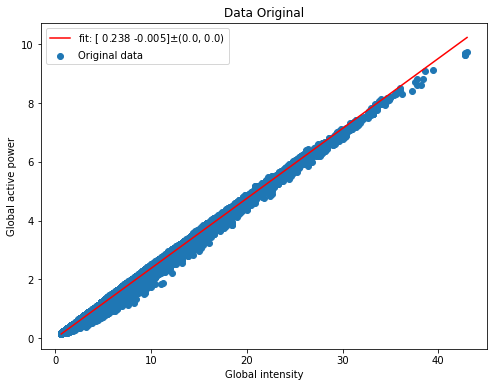

Los coeficientes son : [ 0.2380262  -0.00498205]
El sigma de los coeficientes son : [0. 0.]
Error on fit is = 0.04925499323758528


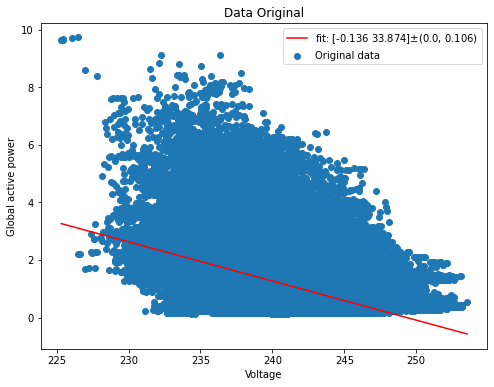

Los coeficientes son : [-0.13586092 33.87352423]
El sigma de los coeficientes son : [0.    0.106]
Error on fit is = 0.8487935137294275


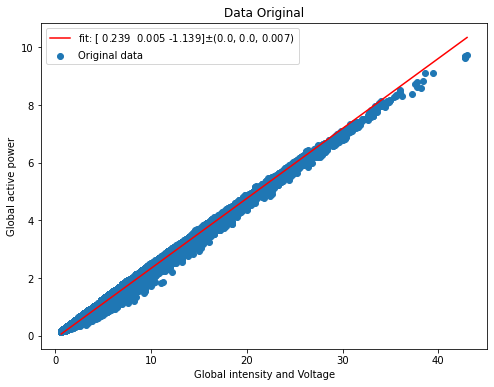

Los coeficientes son : [ 0.23947996  0.00466923 -1.13918528]
El sigma de los coeficientes son : [0.    0.    0.007]
Error on fit is = 0.04776192256518117


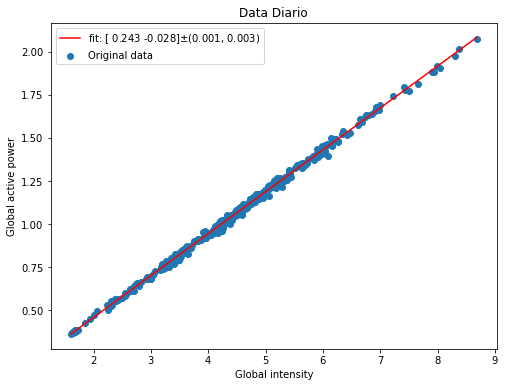

Los coeficientes son : [ 0.24305793 -0.02753221]
El sigma de los coeficientes son : [0.001 0.003]
Error on fit is = 0.015224732467354679


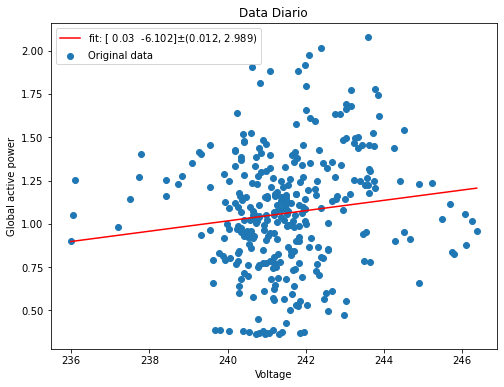

Los coeficientes son : [ 0.0296603  -6.10166907]
El sigma de los coeficientes son : [0.012 2.989]
Error on fit is = 0.34128269795840077


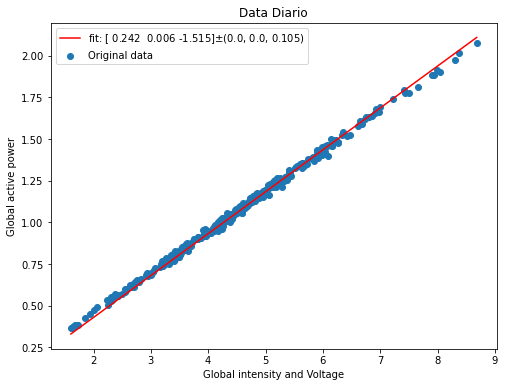

Los coeficientes son : [ 0.24235044  0.00617299 -1.51527187]
El sigma de los coeficientes son : [0.    0.    0.105]
Error on fit is = 0.011938888071503433


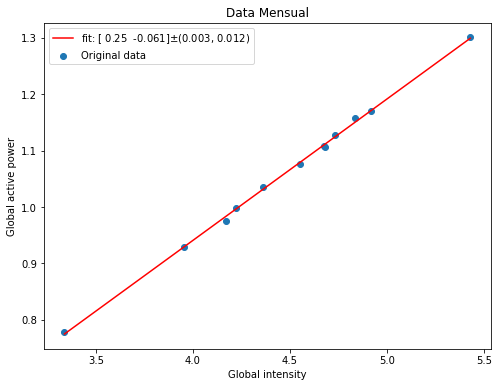

Los coeficientes son : [ 0.25042854 -0.06067193]
El sigma de los coeficientes son : [0.003 0.012]
Error on fit is = 0.004125583875027927


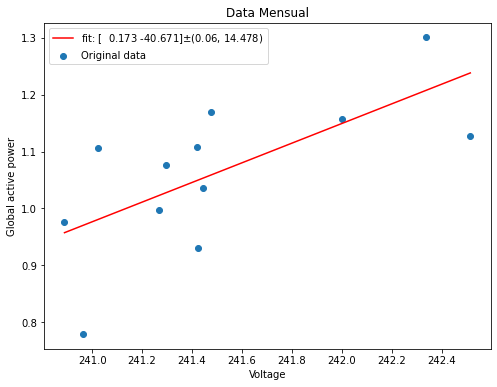

Los coeficientes son : [  0.17281052 -40.67097826]
El sigma de los coeficientes son : [ 0.06  14.478]
Error on fit is = 0.09452198916921928


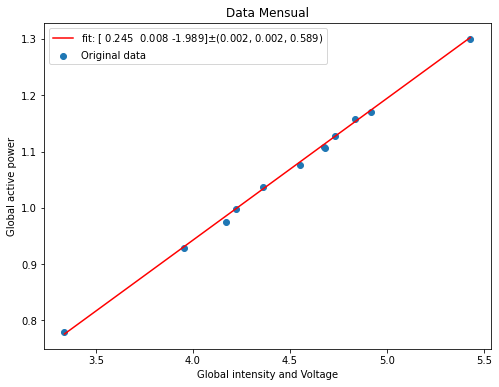

Los coeficientes son : [ 0.24524991  0.00808133 -1.98910306]
El sigma de los coeficientes son : [0.002 0.002 0.589]
Error on fit is = 0.0027880713571015515


In [66]:
#Se efectúa la regresión lineal de los datos con las 3 relaciones y se almacenan los errores.
Error_original = fit(data, "Data Original")
Error_diario = fit(data_d, "Data Diario")
Error_mensual = fit(data_m, "Data Mensual")

# Conclusiones:
- La mejor relación es la de "Global_active_power vs Global_intensity"; con un error de 0.207
- La peor relación es la de "Active_power vs Voltage"
- El error es menor cuando el intervalo es mayor, es decir que para meses es el menor, seguido por el de días y por último el de minutos, que es el mayor error de entre los tres.